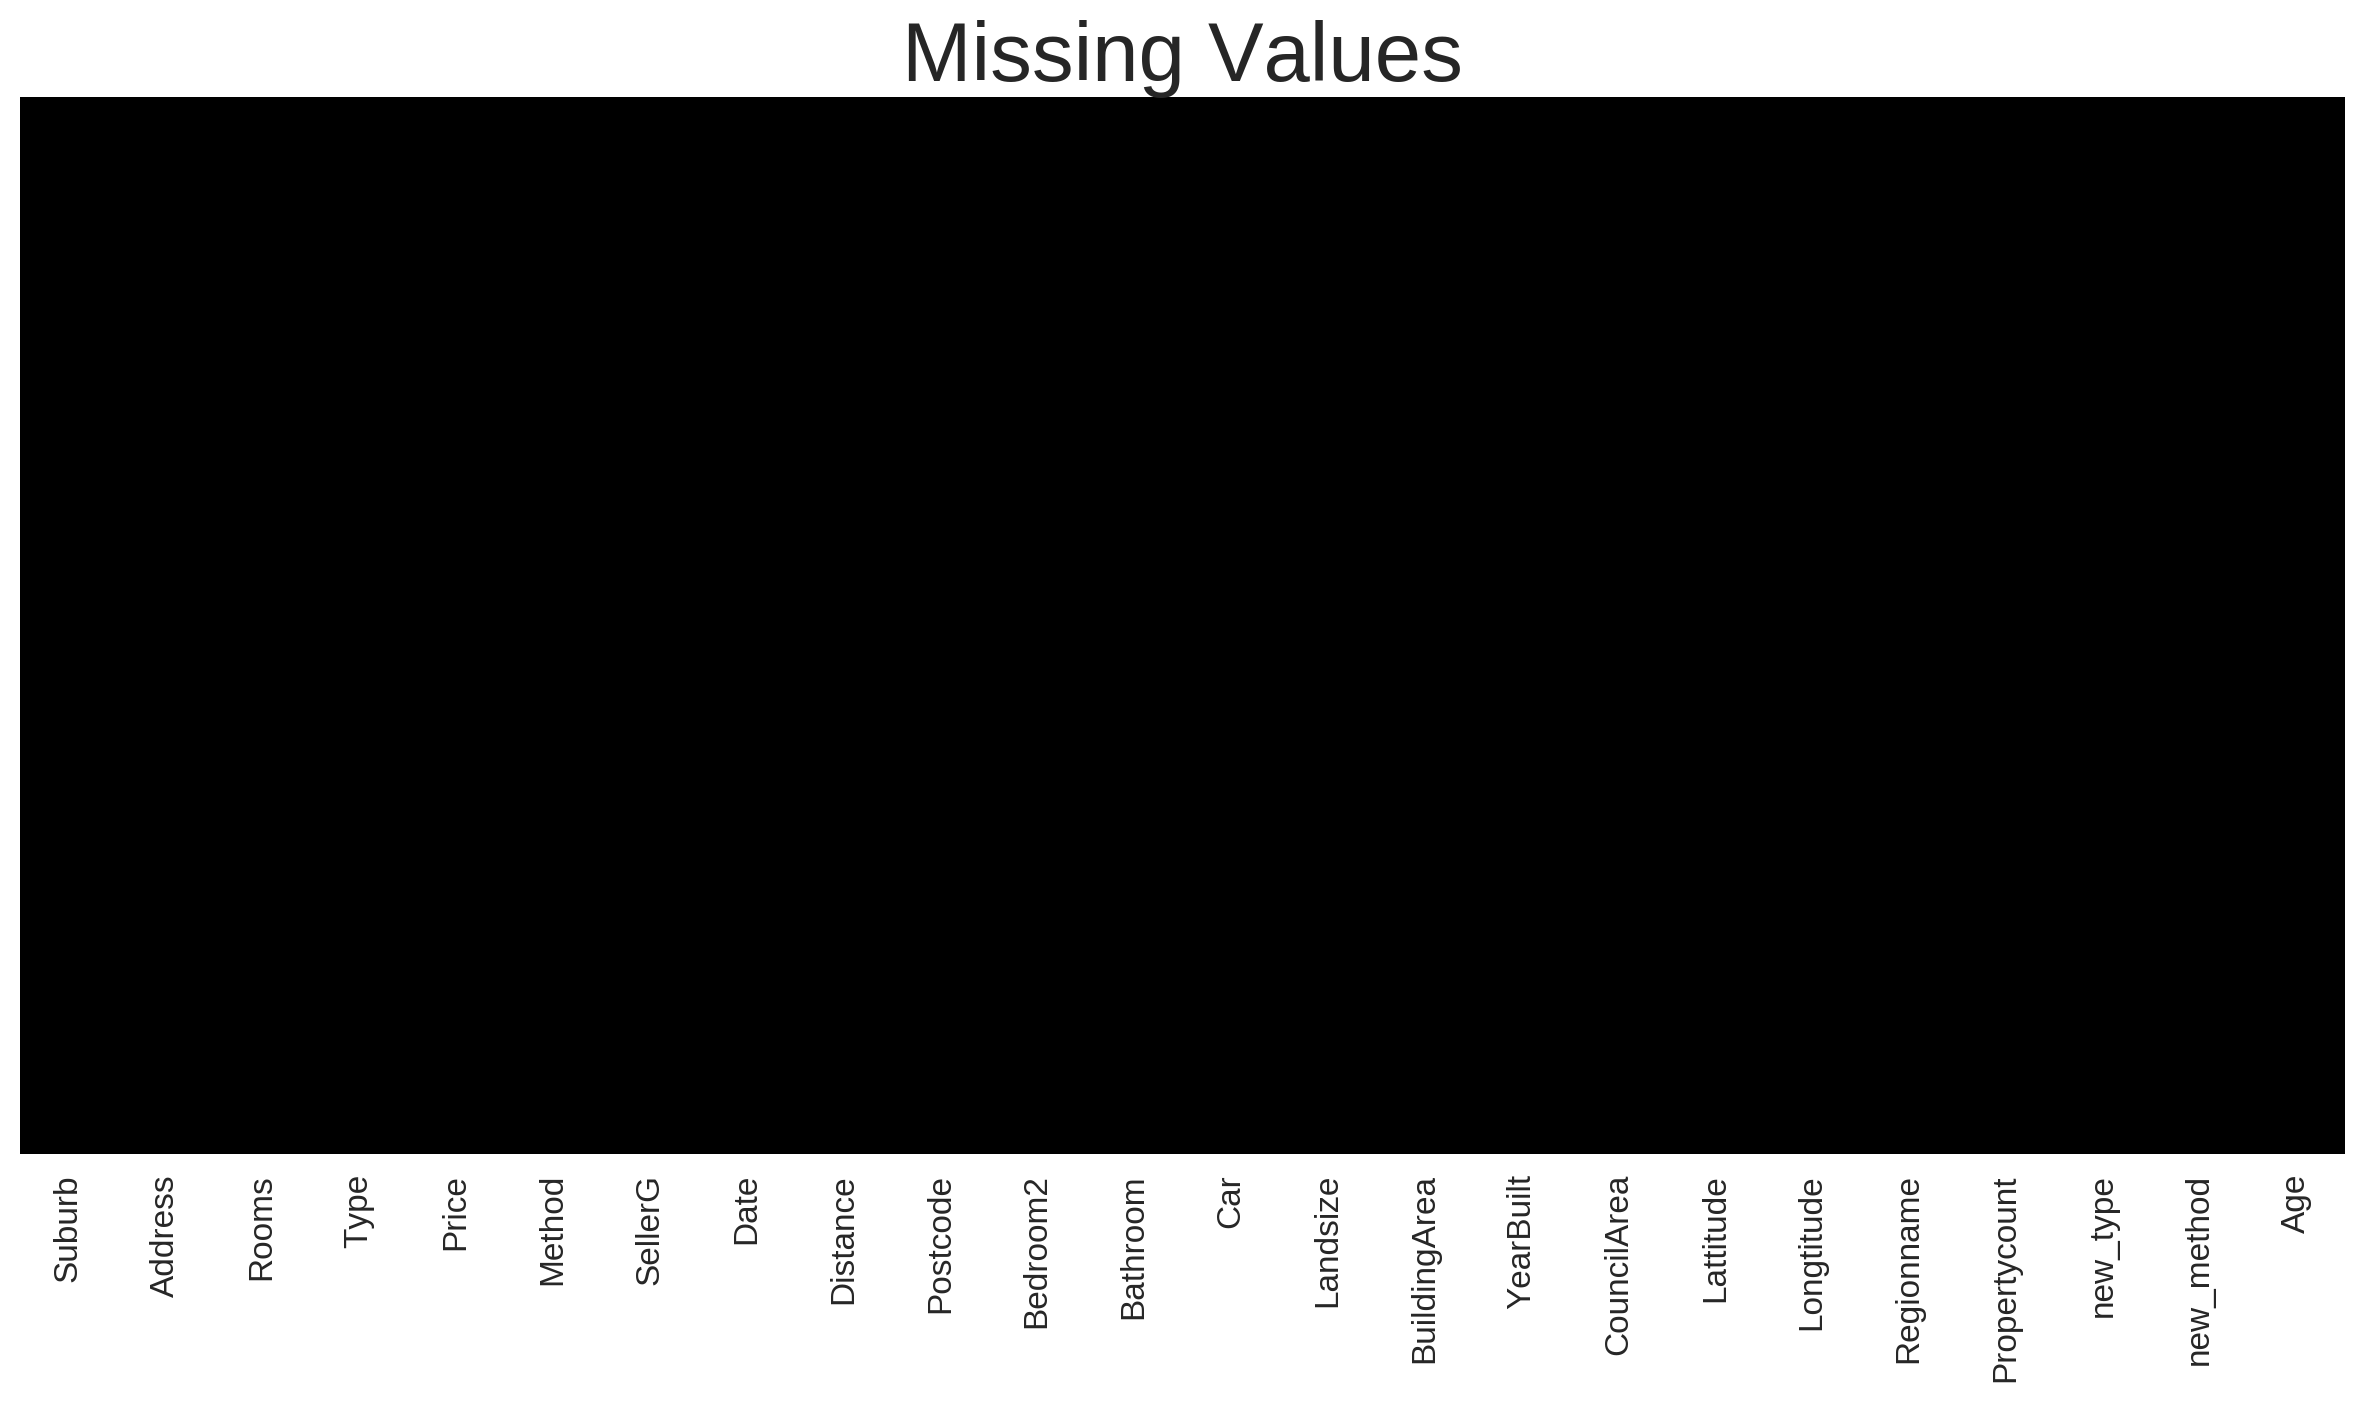

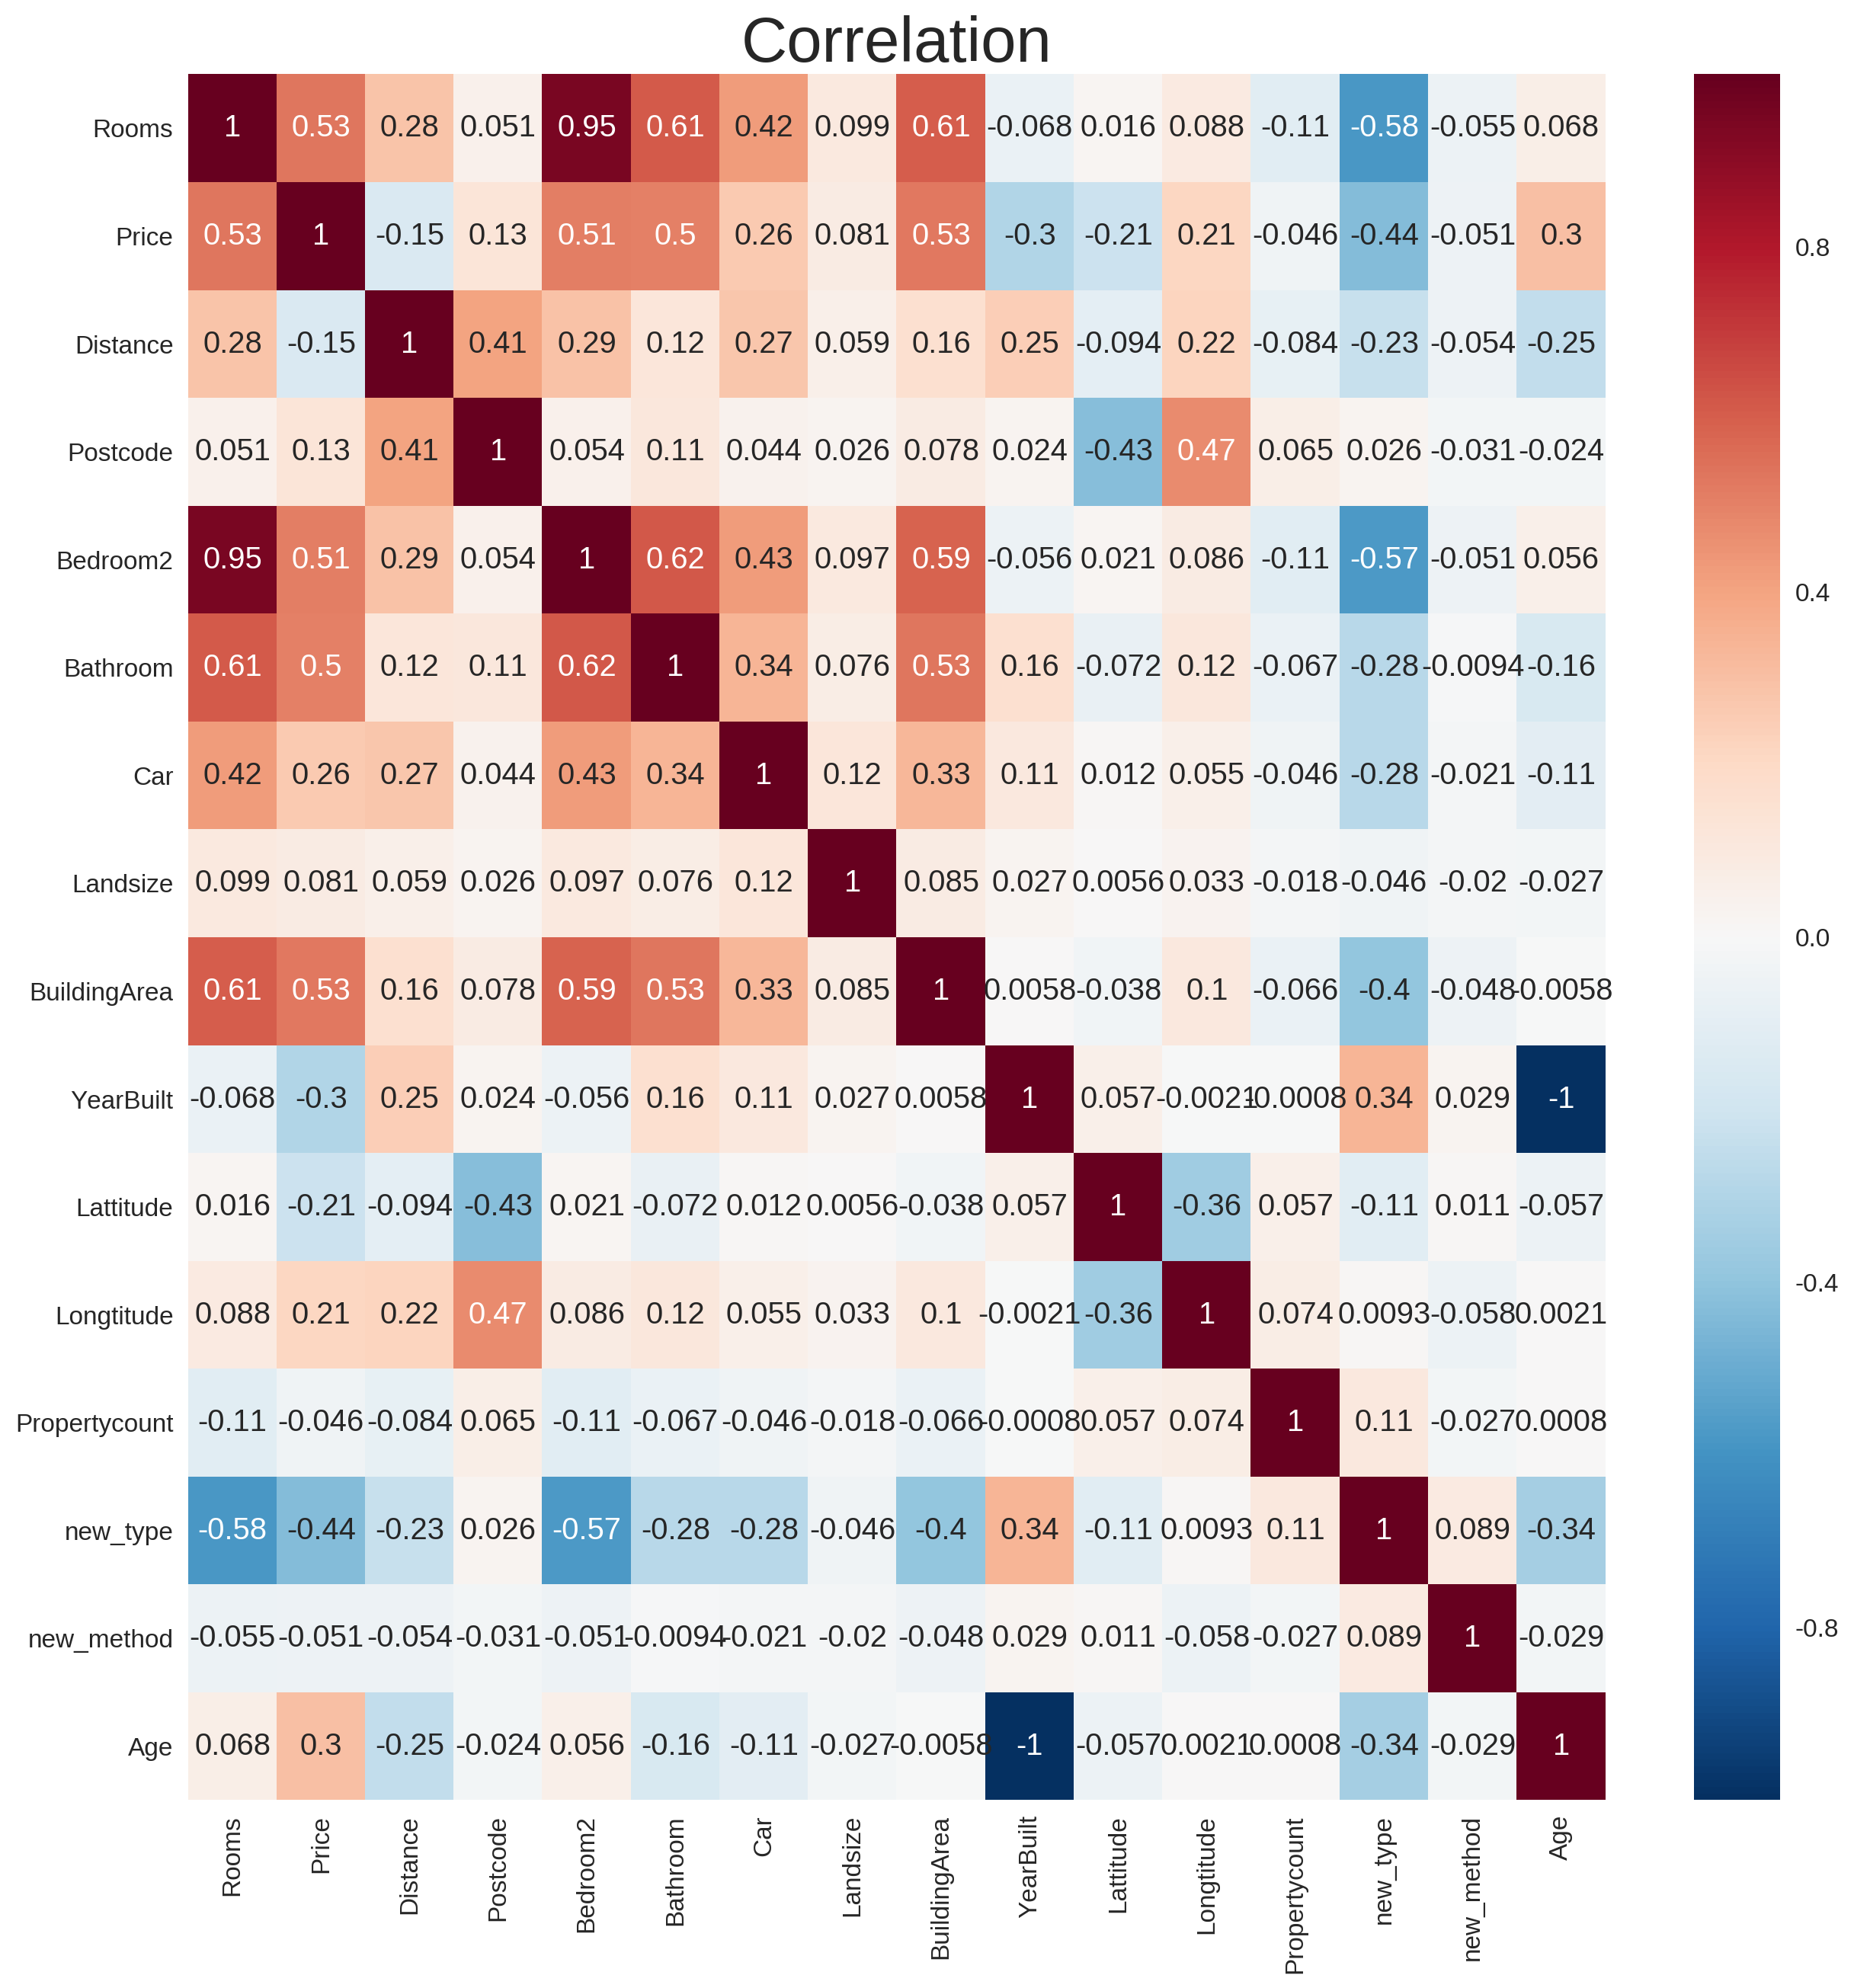

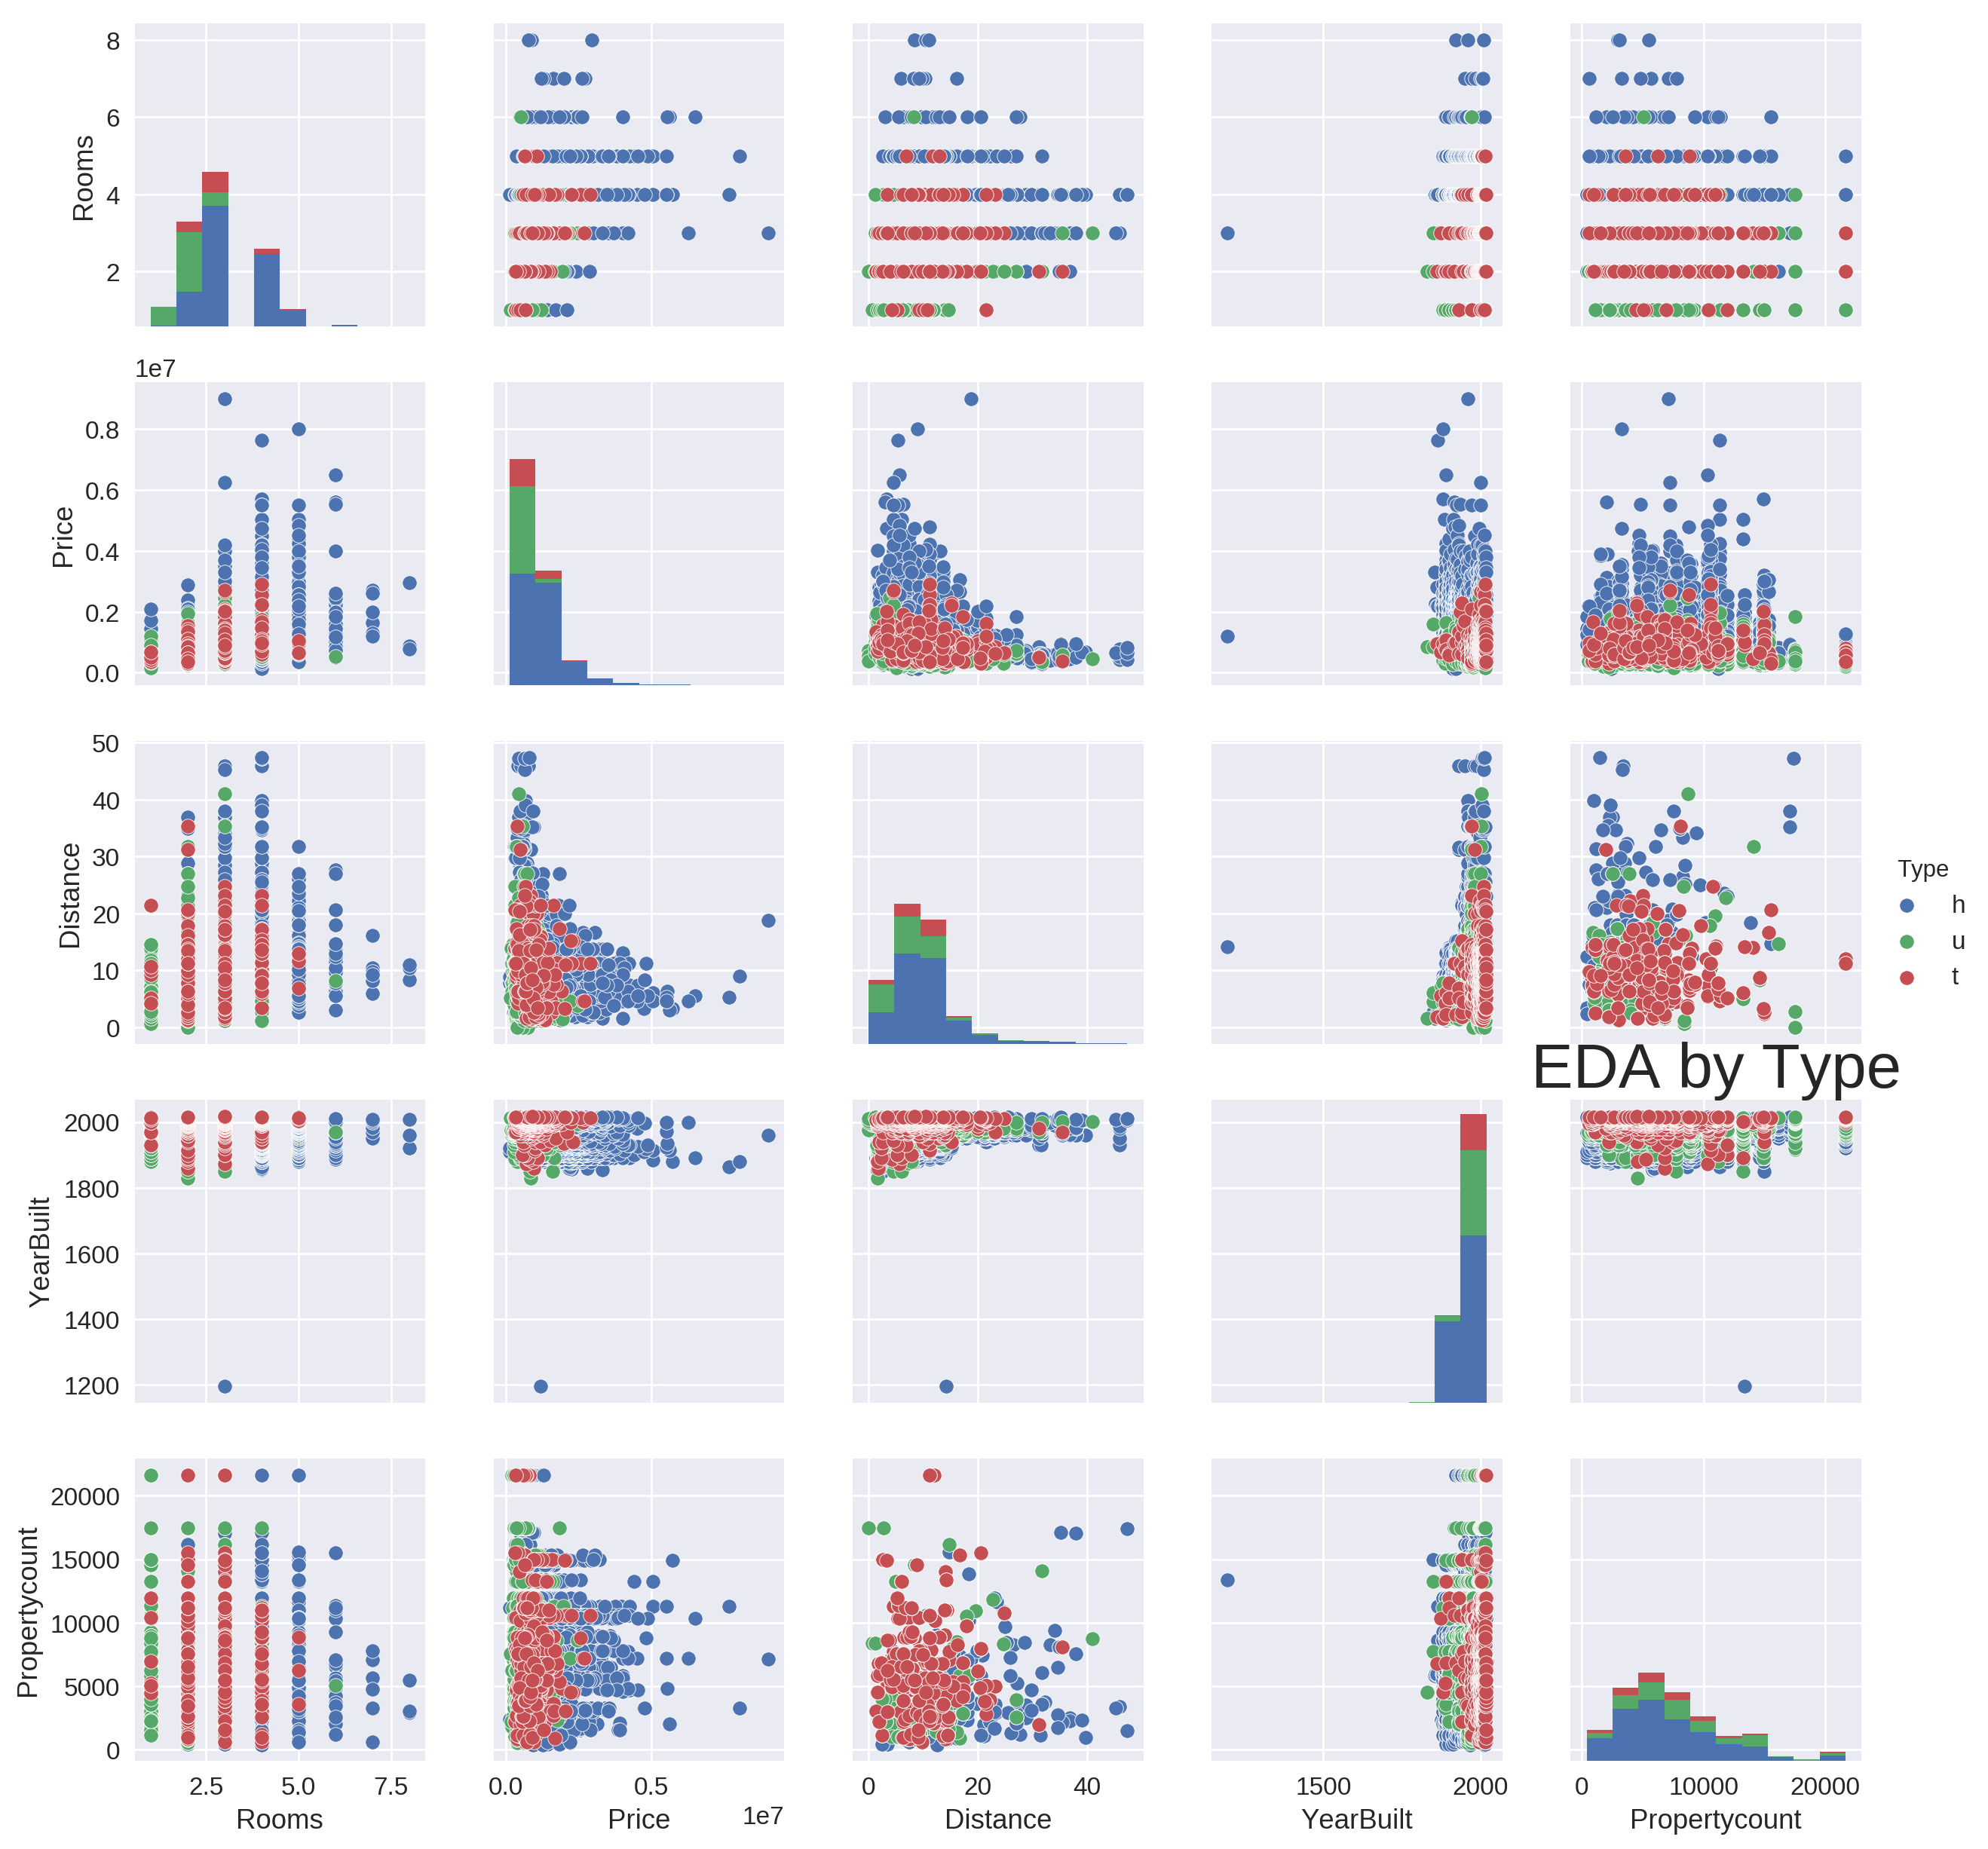

In [ ]:
## Daeun Go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

################################################################################
##Data loading##################################################################
################################################################################
melbourne_data = pd.read_csv("/home/dockeruser/df/Melbourne_housing_extra_data-18-08-2017.csv")
filtered_melbourne_data = melbourne_data.dropna(axis=0)
melbourne_df = pd.DataFrame(filtered_melbourne_data)
melbourne_df

le = preprocessing.LabelEncoder()
le.fit(list(melbourne_df["Type"]))
new_type = le.transform(list(melbourne_df["Type"]))

melbourne_df["new_type"] = new_type

le.fit(list(melbourne_df["Method"]))
new_method = le.transform(list(melbourne_df["Method"]))
melbourne_df["new_method"] = new_method
melbourne_df['Age'] = 2017 - melbourne_df['YearBuilt']

#print(df2)
###############################################################################
## DATA Exploration############################################################
###############################################################################
cols = ['Rooms', 'Type', 'Price', 'Distance', 'YearBuilt', 'Propertycount','Regionname']
#print('cols', df2[cols])

# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(melbourne_df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.title('Missing Values', fontsize=30)
plt.show()
# Check number of missing values
melbourne_df.isnull().sum()
#Correlation for each variables
fig, ax = plt.subplots(figsize=(15,15)) 
sns.plt.title('Correlation', fontsize=30)
sns.heatmap(melbourne_df.corr(), annot=True)
#1st EDA by Type
sns.pairplot(df2[cols], hue='Type')
plt.title('EDA by Type', fontsize=30)
plt.show()
#2nd EDA by Regionname
sns.pairplot(df2[cols], hue='Regionname')
plt.title('EDA by Region', fontsize=30)
plt.show()
#Time series prices for checking any surprising event
melbourne_df["Date"] = pd.to_datetime(melbourne_df["Date"],dayfirst=True)
len(melbourne_df["Date"].unique())/4 ##4Q divided
var = melbourne_df[melbourne_df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = melbourne_df[melbourne_df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = melbourne_df[melbourne_df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))
#Price distribution by region, type, and number of rooms
sns.lmplot("Distance","Price",melbourne_df[(melbourne_df["Rooms"]<=5) & 
                                         (melbourne_df["Rooms"]> 1) & 
                                        (melbourne_df["Price"]< 2000000)
                                       ].dropna(),hue="Rooms", size=10)
sns.plt.title('Distance and Price for rooms', fontsize=30)
#Room and price
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='Rooms',y='Price',data=melbourne_df)
#Region and price
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='Regionname',y='Price',data=melbourne_df)

#Scatter plots
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = melbourne_df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')


plt.show()

## Descriptive Statistics
df2.describe()

## Linear Regression
# Create features variable 
X = melbourne_df[['Rooms', 'Distance', 'Car', 'Landsize', 'BuildingArea','Age','Propertycount']]

# Create target variable
y = melbourne_df['Price']
# split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# scatter plot
#plt.scatter(X_train, y_train, color="pink")
#plt.scatter(X_test, y_test, color="red")
#plt.scatter(X_test, y_pred, color="lightgreen")

#plt.plot(X_train, regressor.predict(X_train), color="blue")
#plt.show()
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:$',np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'is away from the actual value.')

cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
print('Coefficient : ',cdf)
